Mounted at /content/drive
Libraries imported successfully!
Training data: (838944, 11)
Test data: (20000, 10)
Using original text columns

Rating distribution in training data:
overall
1     82950
2     56756
3     81239
4    156514
5    461485
Name: count, dtype: int64

Sampled data distribution:
Label 1: 2500 samples
Label 2: 2500 samples
Label 3: 2500 samples
Label 4: 2500 samples
Label 5: 2500 samples
Original training size: 838944
Sampled training size: 12500
Vectorizing text data...
Training sequences: (12500, 150)
Test sequences: (20000, 150)
Vocabulary size: 28822
Actual words used: 15000
Building optimized model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model summary after building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 150, 64)          │       960,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm              │ (32, 150, 128)         │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling              │ (32, 128)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (32, 128)              │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (32, 5)                │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,037,125 (3.96 MB)

 Trainable params: 1,036,869 (3.96 MB)

 Non-trainable params: 256 (1.00 KB)

None
Training split: (10625, 150)
Validation split: (1875, 150)
Class weights:
  Class 1: 1.00
  Class 2: 1.00
  Class 3: 1.00
  Class 4: 1.00
  Class 5: 1.00
Starting model training...
Starting training...
Epoch 1/8
167/167 ━━━━━━━━━━━━━━━━━━━━ 166s 940ms/step - accuracy: 0.2321 - loss: 1.7159 - val_accuracy: 0.2715 - val_loss: 1.6695 - learning_rate: 0.0010
Epoch 2/8
167/167 ━━━━━━━━━━━━━━━━━━━━ 151s 902ms/step - accuracy: 0.4438 - loss: 1.3835 - val_accuracy: 0.3701 - val_loss: 1.5063 - learning_rate: 0.0010
Epoch 3/8
167/167 ━━━━━━━━━━━━━━━━━━━━ 154s 921ms/step - accuracy: 0.5606 - loss: 1.1350 - val_accuracy: 0.4645 - val_loss: 1.2899 - learning_rate: 0.0010
Epoch 4/8
167/167 ━━━━━━━━━━━━━━━━━━━━ 149s 891ms/step - accuracy: 0.6640 - loss: 0.9127 - val_accuracy: 0.4699 - val_loss: 1.4071 - learning_rate: 0.0010
Epoch 5/8
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.7520 - loss: 0.7284
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
167/167 ━━

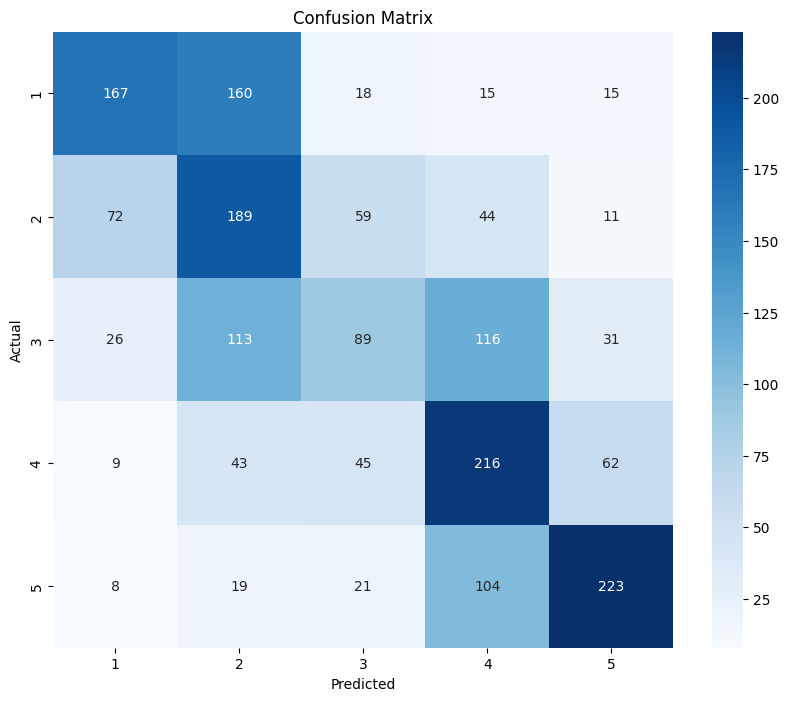

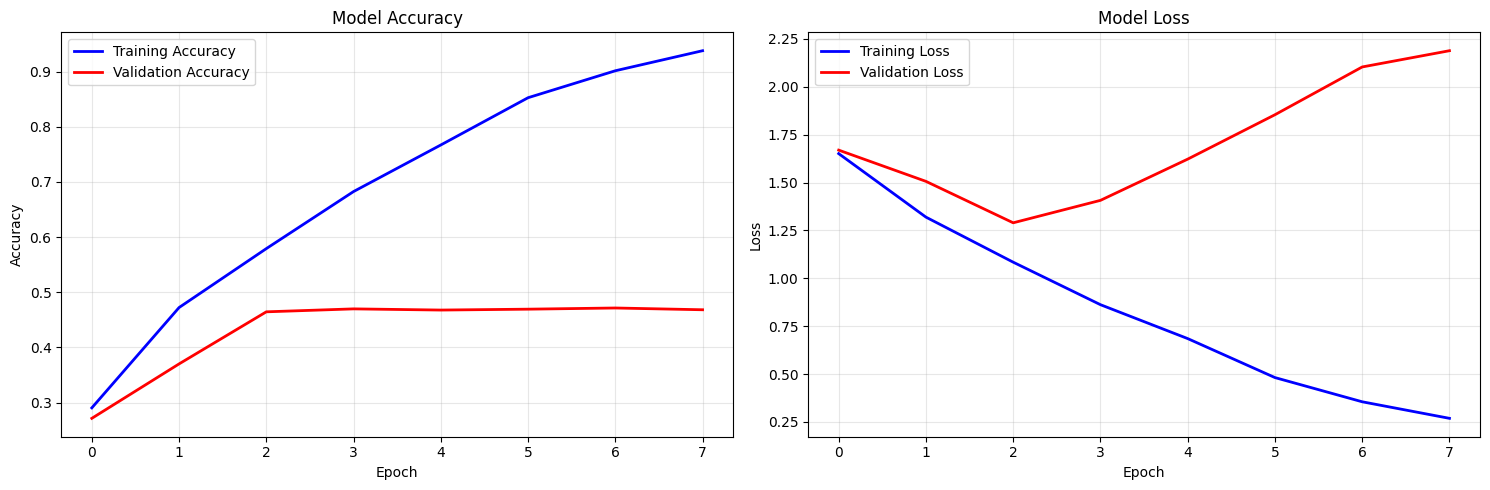

Generating final predictions...
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step

Prediction distribution:
Rating 1:   3038 samples ( 15.2%)
Rating 2:   5095 samples ( 25.5%)
Rating 3:   2494 samples ( 12.5%)
Rating 4:   5590 samples ( 28.0%)
Rating 5:   3783 samples ( 18.9%)

Submission file saved: q2_submission_optimized.csv
First 10 predictions:
   predicted
0          1
1          1
2          1
3          2
4          1
5          2
6          2
7          2
8          2
9          2

MODEL ARCHITECTURE SUMMARY
MODEL ARCHITECTURE:
  - Embedding: 64 dimensions, 15000 vocabulary
  - Bidirectional LSTM: 64 units
  - Global Max Pooling
  - Batch Normalization
  - Dense Layers: 64 → 32 → 5 units
  - Dropout: 0.3, 0.2
  - Regularization: L2 (0.001)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Bidirectional, LSTM, Dense,
                                   Dropout, GlobalMaxPooling1D, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیم seed برای تکرارپذیری
tf.random.set_seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

project_path = '/content/drive/MyDrive/Colab Notebooks/Final Project/'

def load_and_preprocess_data():
    """بارگذاری و پیش‌پردازش داده‌ها"""
    train_df = pd.read_csv(project_path + 'train_data.csv', low_memory=False)
    test_df = pd.read_csv(project_path + 'test_data.csv')

    print(f"Training data: {train_df.shape}")
    print(f"Test data: {test_df.shape}")

    # انتخاب ستون متن
    if 'cleaned_review' in train_df.columns:
        print("Using pre-cleaned text columns")
        review_col = 'cleaned_review'
        summary_col = 'cleaned_summary'
    else:
        print("Using original text columns")
        review_col = 'reviewText'
        summary_col = 'summary'

    # ترکیب متن نظر و خلاصه
    train_df['combined_text'] = train_df[review_col].fillna('') + " " + train_df[summary_col].fillna('')
    test_df['combined_text'] = test_df[review_col].fillna('') + " " + test_df[summary_col].fillna('')

    # تبدیل برچسب‌ها به 0-4
    y_train = train_df['overall'] - 1

    print("\nRating distribution in training data:")
    print(train_df['overall'].value_counts().sort_index())

    return train_df, test_df, y_train

# بارگذاری داده‌ها
train_df, test_df, y_train = load_and_preprocess_data()

def create_balanced_dataset(df, y, samples_per_label=2500):
    """ایجاد مجموعه داده متوازن"""
    sampled_indices = []

    for label in range(5):
        label_indices = df.index[y == label].tolist()

        if len(label_indices) > samples_per_label:
            selected_indices = np.random.choice(label_indices, size=samples_per_label, replace=False)
        else:
            selected_indices = label_indices

        sampled_indices.extend(selected_indices)

    df_sampled = df.loc[sampled_indices].copy()
    y_sampled = y[sampled_indices]

    print(f"\nSampled data distribution:")
    for label in range(5):
        count = np.sum(y_sampled == label)
        print(f"Label {label+1}: {count} samples")

    return df_sampled, y_sampled

# ایجاد داده متوازن
train_df_sampled, y_train_sampled = create_balanced_dataset(train_df, y_train, samples_per_label=2500)
print(f"Original training size: {len(train_df)}")
print(f"Sampled training size: {len(train_df_sampled)}")

def optimized_text_vectorization(train_texts, test_texts, max_features=15000, max_len=150):
    """بهینه‌سازی وکتورسازی متن"""
    print("Vectorizing text data...")

    tokenizer = Tokenizer(
        num_words=max_features,
        oov_token="<OOV>",
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        lower=True
    )
    tokenizer.fit_on_texts(train_texts)

    train_sequences = tokenizer.texts_to_sequences(train_texts)
    test_sequences = tokenizer.texts_to_sequences(test_texts)

    X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
    X_test = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

    print(f"Training sequences: {X_train.shape}")
    print(f"Test sequences: {X_test.shape}")
    print(f"Vocabulary size: {len(tokenizer.word_index)}")
    print(f"Actual words used: {max_features}")

    return X_train, X_test, tokenizer

# وکتورسازی متن
X_train, X_test, tokenizer = optimized_text_vectorization(
    train_df_sampled['combined_text'].values,
    test_df['combined_text'].values,
    max_features=15000,
    max_len=150
)

def build_optimized_model(vocab_size, max_len=150, num_classes=5):
    """ساخت مدل بهینه‌شده"""
    print("Building optimized model...")

    model = Sequential()

    # لایه Embedding بهینه‌شده
    model.add(Embedding(
        input_dim=vocab_size + 1,
        output_dim=64,
        input_length=max_len,
        name="embedding"
    ))

    # یک لایه LSTM دوطرفه
    model.add(Bidirectional(
        LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.1),  # کاهش واحدها
        name="bidirectional_lstm"
    ))

    # Global Max Pooling برای استخراج ویژگی‌های مهم
    model.add(GlobalMaxPooling1D(name="global_max_pooling"))

    # Batch Normalization برای پایداری
    model.add(BatchNormalization(name="batch_norm_1"))

    # لایه‌های Fully Connected بهینه‌شده
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), name="dense_1"))
    model.add(Dropout(0.3, name="dropout_1"))  # کاهش dropout

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001), name="dense_2"))
    model.add(Dropout(0.2, name="dropout_2"))  # کاهش dropout

    # لایه خروجی
    model.add(Dense(num_classes, activation='softmax', name="output"))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# ساخت مدل - ابتدا مدل را بسازید سپس با داده واقعی build کنید
vocab_size = min(15000, len(tokenizer.word_index))
model = build_optimized_model(vocab_size=vocab_size, max_len=150)

# برای نمایش صحیح output shape، مدل را با یک batch نمونه build کنید
sample_batch = X_train[:32]  # یک batch کوچک
_ = model(sample_batch)  # این کار model را build می‌کند

print("Model summary after building:")
print(model.summary())

def prepare_training_data(X_train, y_train, validation_size=0.15):
    """آماده‌سازی داده‌های آموزش"""
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train,
        test_size=validation_size,
        random_state=42,
        stratify=y_train
    )

    print(f"Training split: {X_train_split.shape}")
    print(f"Validation split: {X_val.shape}")

    # محاسبه وزن کلاس‌ها
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_train_split),
        y=y_train_split
    )
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

    print("Class weights:")
    for k, v in class_weight_dict.items():
        print(f"  Class {k+1}: {v:.2f}")

    return X_train_split, X_val, y_train_split, y_val, class_weight_dict

# آماده‌سازی داده‌های آموزش
X_train_split, X_val, y_train_split, y_val, class_weight_dict = prepare_training_data(
    X_train, y_train_sampled
)

def train_model(model, X_train, y_train, X_val, y_val, class_weight_dict):
    """آموزش مدل با تنظیمات بهینه"""
    print("Starting training...")

    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=3,  # کاهش بیشتر patience
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=2,
            min_lr=1e-6,
            verbose=1
        )
    ]

    history = model.fit(
        X_train, y_train,
        batch_size=64,  # افزایش batch size برای سرعت بیشتر
        epochs=8,       # کاهش epochs
        validation_data=(X_val, y_val),
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=1
    )

    print("Training completed!")
    return history

# آموزش مدل
print("Starting model training...")
history = train_model(model, X_train_split, y_train_split, X_val, y_val, class_weight_dict)

def comprehensive_evaluation(model, X_val, y_val, history):
    """ارزیابی جامع مدل"""
    print("\n" + "="*60)
    print("COMPREHENSIVE EVALUATION")
    print("="*60)

    # پیش‌بینی
    y_pred_proba = model.predict(X_val, batch_size=128, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # محاسبه معیارها
    accuracy = np.mean(y_pred == y_val)
    f1_micro = f1_score(y_val, y_pred, average='micro')
    f1_macro = f1_score(y_val, y_pred, average='macro')
    f1_weighted = f1_score(y_val, y_pred, average='weighted')

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Validation F1-Score (Micro): {f1_micro:.4f}")
    print(f"Validation F1-Score (Macro): {f1_macro:.4f}")
    print(f"Validation F1-Score (Weighted): {f1_weighted:.4f}")

    # گزارش طبقه‌بندی
    print("\nDetailed Classification Report:")
    print(classification_report(y_val, y_pred, target_names=['1', '2', '3', '4', '5']))

    # ماتریس درهم‌ریختگی
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # نمودارهای یادگیری
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return y_pred

# ارزیابی مدل
y_val_pred = comprehensive_evaluation(model, X_val, y_val, history)

def generate_final_predictions(model, X_test):
    """تولید پیش‌بینی‌های نهایی"""
    print("Generating final predictions...")
    test_pred_proba = model.predict(X_test, batch_size=128, verbose=1)
    test_pred = np.argmax(test_pred_proba, axis=1) + 1  # تبدیل به 1-5

    return test_pred

# تولید پیش‌بینی‌ها
test_predictions = generate_final_predictions(model, X_test)

# تحلیل توزیع پیش‌بینی‌ها
print("\nPrediction distribution:")
unique, counts = np.unique(test_predictions, return_counts=True)
for rating, count in zip(unique, counts):
    percentage = (count / len(test_predictions)) * 100
    print(f"Rating {rating}: {count:6d} samples ({percentage:5.1f}%)")

# ذخیره فایل submission
submission_df = pd.DataFrame({'predicted': test_predictions})
submission_df.to_csv(project_path + 'q2_submission_optimized.csv', index=False)

print(f"\nSubmission file saved: q2_submission_optimized.csv")
print("First 10 predictions:")
print(submission_df.head(10))

def print_model_comparison():
    """نمایش مقایسه مدل"""
    print("\n" + "="*60)
    print("MODEL ARCHITECTURE SUMMARY")
    print("="*60)
    print("MODEL ARCHITECTURE:")
    print("  - Embedding: 64 dimensions, 15000 vocabulary")
    print("  - Bidirectional LSTM: 64 units")
    print("  - Global Max Pooling")
    print("  - Batch Normalization")
    print("  - Dense Layers: 64 → 32 → 5 units")
    print("  - Dropout: 0.3, 0.2")
    print("  - Regularization: L2 (0.001)")

print_model_comparison()